In [9]:
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def get_data(url):
    response = requests.get(url)
    if response.status_code == 200:
        url_data = response.json()
    else:
        print(f"Request failed with status code {response.status_code}")

    return url_data

weather = get_data("https://api.openf1.org/v1/weather")

In [3]:
weather[1]

{'date': '2023-02-23T06:55:55.755000+00:00',
 'session_key': 9222,
 'meeting_key': 1140,
 'track_temperature': 29.7,
 'wind_speed': 4.9,
 'rainfall': 0,
 'humidity': 26.0,
 'pressure': 1012.2,
 'air_temperature': 23.8,
 'wind_direction': 193}

In [5]:
df = pd.DataFrame(weather)
df.head(10)

,date,session_key,meeting_key,track_temperature,wind_speed,rainfall,humidity,pressure,air_temperature,wind_direction
0,2023-02-23T06:54:55.756000+00:00,9222,1140,29.7,4.9,0,26.0,1012.2,23.8,193
1,2023-02-23T06:55:55.755000+00:00,9222,1140,29.7,4.9,0,26.0,1012.2,23.8,193
2,2023-02-23T06:56:55.754000+00:00,9222,1140,30.0,4.3,0,27.0,1012.2,23.8,193
3,2023-02-23T06:57:55.754000+00:00,9222,1140,30.1,5.5,0,27.0,1012.2,23.8,186
4,2023-02-23T06:58:55.753000+00:00,9222,1140,30.1,4.4,0,27.0,1012.2,23.8,182
5,2023-02-23T06:59:55.752000+00:00,9222,1140,30.3,4.5,0,28.0,1012.2,23.8,185
6,2023-02-23T07:00:55.783000+00:00,9222,1140,30.4,4.4,0,27.0,1012.2,23.9,187
7,2023-02-23T07:01:55.767000+00:00,9222,1140,30.4,4.6,0,26.0,1012.4,23.9,188
8,2023-02-23T07:02:55.766000+00:00,9222,1140,30.7,5.0,0,27.0,1012.2,24.0,178
9,2023-02-23T07:03:55.765000+00:00,9222,1140,30.8,4.9,0,26.0,1012.2,24.0,191


In [6]:
df.drop(columns=['date'], inplace=True)

In [7]:
df.shape

(31977, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31977 entries, 0 to 31976
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   session_key        31977 non-null  int64  
 1   meeting_key        31977 non-null  int64  
 2   track_temperature  31977 non-null  float64
 3   wind_speed         31977 non-null  float64
 4   rainfall           31977 non-null  int64  
 5   humidity           31977 non-null  float64
 6   pressure           31977 non-null  float64
 7   air_temperature    31977 non-null  float64
 8   wind_direction     31977 non-null  int64  
dtypes: float64(5), int64(4)
memory usage: 2.2 MB


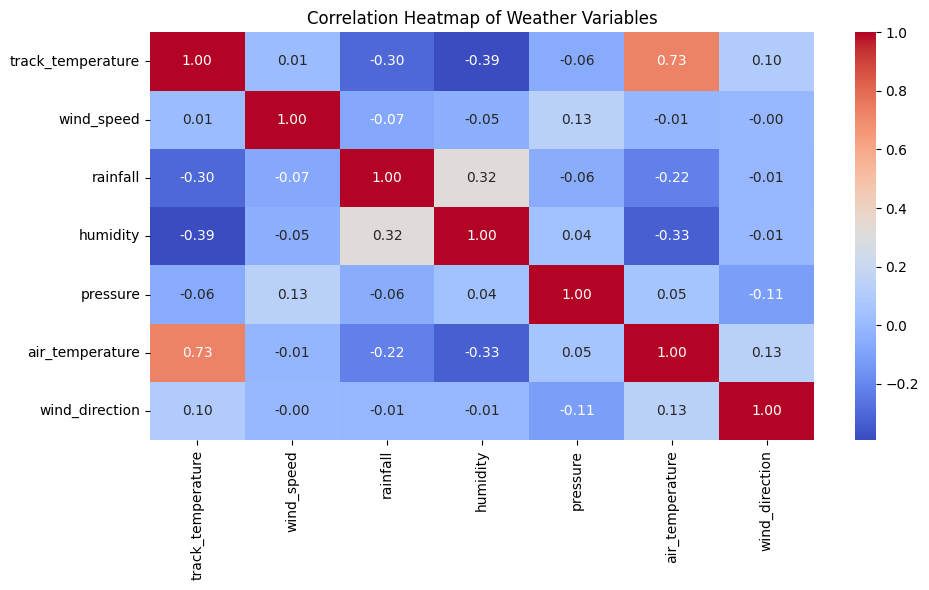

In [10]:
weather_cols = ['track_temperature', 'wind_speed', 'rainfall', 'humidity', 'pressure', 'air_temperature', 'wind_direction']

plt.figure(figsize=(10, 6))
sns.heatmap(df[weather_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Weather Variables")
plt.tight_layout()
plt.show()

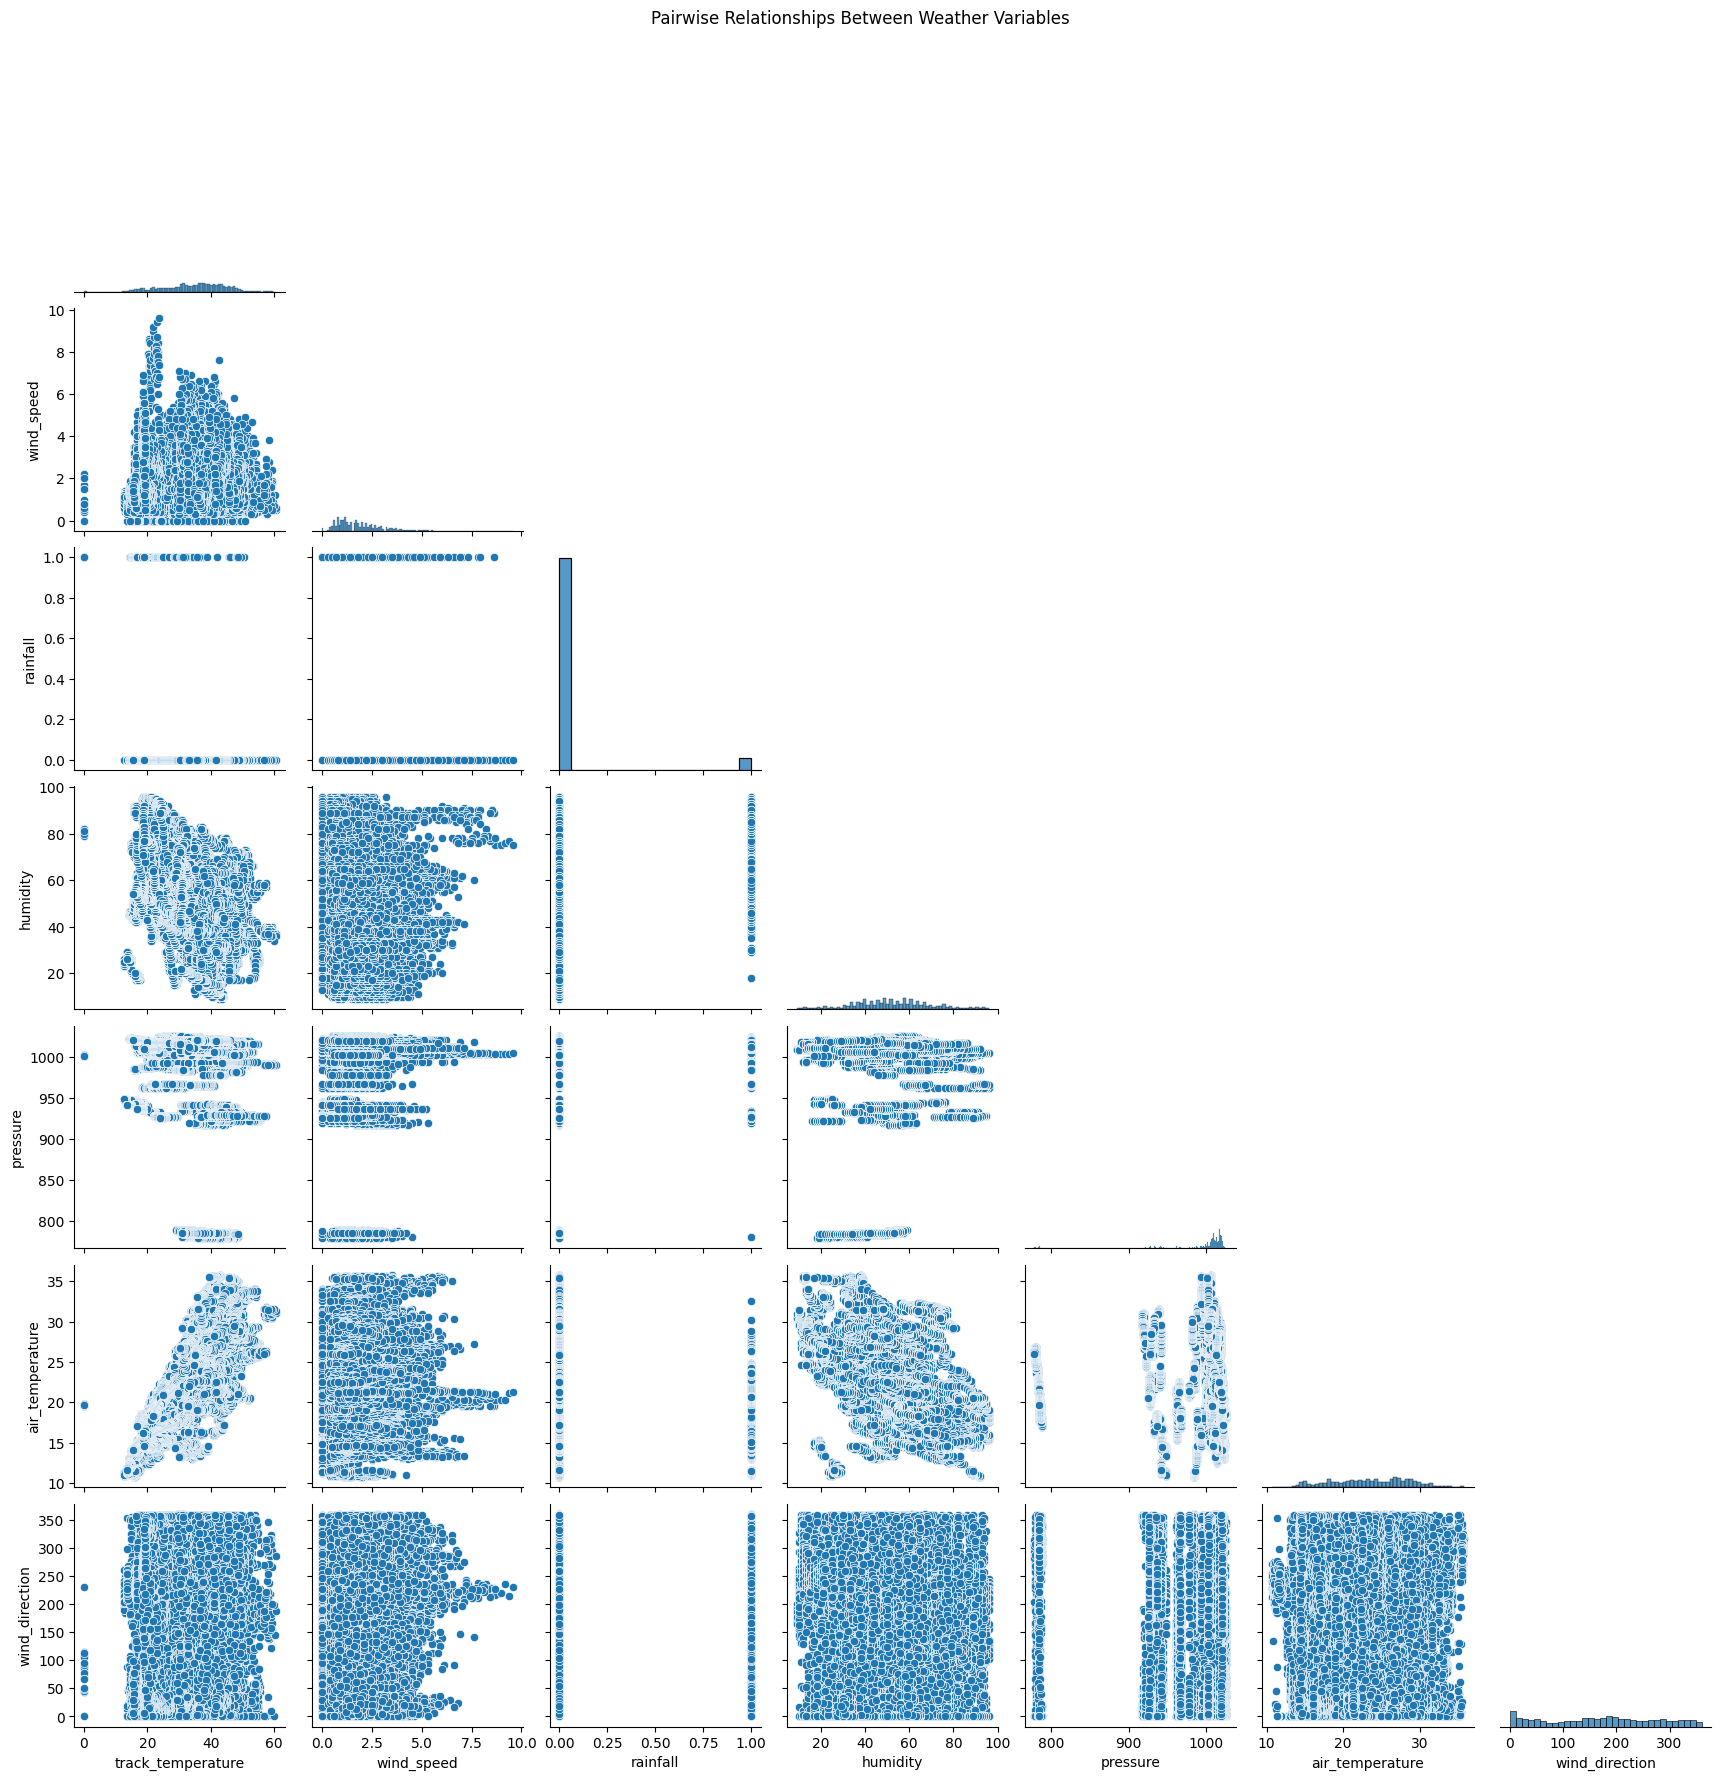

In [11]:
sns.pairplot(df[weather_cols], corner=True)
plt.suptitle("Pairwise Relationships Between Weather Variables", y=1.02)
plt.show()

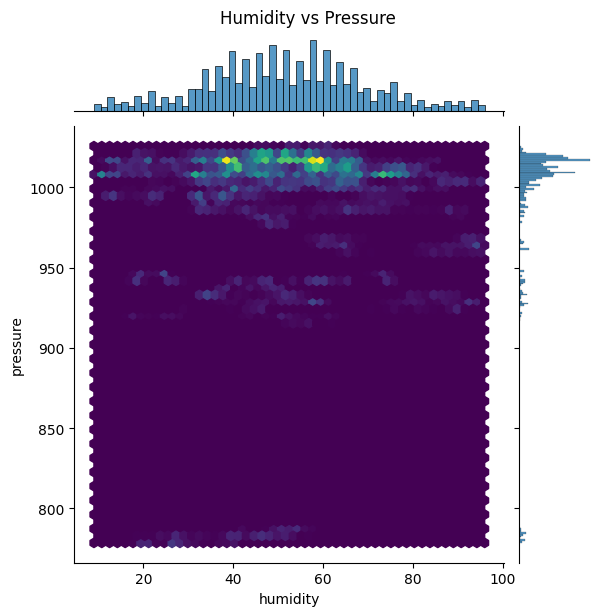

In [13]:
sns.jointplot(data=df, x='humidity', y='pressure', kind='hex', cmap='viridis')
plt.suptitle("Humidity vs Pressure", y=1.02)
plt.show()


### FINAL COLUMNS

In [14]:
df = df[['rainfall', 'humidity', 'track_temperature', 'air_temperature']]
df.head(10)

,rainfall,humidity,track_temperature,air_temperature
0,0,26.0,29.7,23.8
1,0,26.0,29.7,23.8
2,0,27.0,30.0,23.8
3,0,27.0,30.1,23.8
4,0,27.0,30.1,23.8
5,0,28.0,30.3,23.8
6,0,27.0,30.4,23.9
7,0,26.0,30.4,23.9
8,0,27.0,30.7,24.0
9,0,26.0,30.8,24.0


### RANDOM FOREST CLASSIFIER

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [16]:
features = ['humidity', 'track_temperature', 'air_temperature']
target = 'rainfall'

In [17]:
df[target] = (df[target] > 0).astype(int)

In [18]:
X = df[features]
y = df[target]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [20]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
y_pred = model.predict(X_test)

In [22]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9770168855534709

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      6053
           1       0.83      0.72      0.77       343

    accuracy                           0.98      6396
   macro avg       0.91      0.86      0.88      6396
weighted avg       0.98      0.98      0.98      6396


Confusion Matrix:
 [[6001   52]
 [  95  248]]


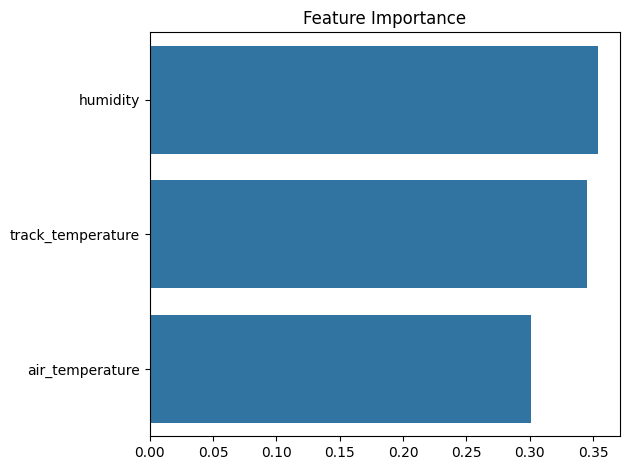

In [23]:
importances = model.feature_importances_
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

In [24]:
import joblib

# Save the model to a file
joblib.dump(model, 'rainfall_predictor_rf.pkl')

['rainfall_predictor_rf.pkl']